<a href="https://colab.research.google.com/github/oneoftwo/generative_model_tutorial/blob/main/AE_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autoencoder**

## **Import and Download Dataset**

In [1]:
import numpy as np
import random as random
import time as time
from tqdm import tqdm
from tqdm.notebook import tqdm

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
from torch import optim

from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
#==============================================================================#
# download dataset ============================================================#
batch_size = 128
download_root = './MNIST_DATASET'
train_dataset = MNIST(download_root, transform=transforms.ToTensor(), \
        train=True, download=True)
test_dataset = MNIST(download_root, transform=transforms.ToTensor(), \
        train=False, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, \
        shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, \
        shuffle=True)
#==============================================================================#

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## **Model**
Autoencoder model using CNN layers as encoder and inverse CNN layers for decoder

In [3]:
################################################################################
# autoencoder ##################################################################


# encoder for autoencoder, CNN based
class Encoder(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(\
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=1), \
            nn.ReLU(), \
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1), \
            nn.ReLU(), \
            nn.Conv2d(32, 64, kernel_size=2, stride=2, padding=0), \
            nn.ReLU(), \
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1), \
            nn.ReLU(), \
            nn.Conv2d(64, 128, kernel_size=2, stride=2, padding=0))
        
        self.fc = nn.Sequential(\
            nn.Linear(6 * 6 * 128, 100), \
            nn.ReLU(), \
            nn.Linear(100, 2))
        
    def forward(self, x):
        b = x.size(0)
        x = self.conv_layers(x)
        x = x.reshape(b, -1)
        x = self.fc(x)
        return x


# decoder for autoencoder
class Decoder(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(\
            nn.Linear(2, 128), \
            nn.SiLU(), \
            nn.Linear(128, 256), \
            nn.SiLU(), \
            nn.Linear(256, 512), \
            nn.SiLU(), \
            nn.Linear(512, 28 * 28))
        
    def forward(self, x):
        b = x.size(0)
        x = self.fc(x)
        x = x.reshape(b, 1, 28, 28)
        x = torch.sigmoid(x)
        return x


# autoencoder
class Autoencoder(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        z = self.encoder(x)
        x_regen = self.decoder(z)
        return x_regen, z
    

################################################################################


#==============================================================================#
# sanity check ================================================================#
x = torch.rand(128, 1, 28, 28)
auto = Autoencoder()
x_regen, z = auto(x)
print('size of encoded latent: ', z.size())
print('size of regenerated image: ', x_regen.size())
#==============================================================================#

size of encoded latent:  torch.Size([128, 2])
size of regenerated image:  torch.Size([128, 1, 28, 28])


## **Train**

epoch  1
reconstruction loss: 11.424
epoch  2
reconstruction loss: 5.363
epoch  3
reconstruction loss: 5.151
epoch  4
reconstruction loss: 4.590


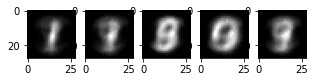

epoch  5
reconstruction loss: 4.446
epoch  6
reconstruction loss: 4.374
epoch  7
reconstruction loss: 4.323
epoch  8
reconstruction loss: 4.280
epoch  9
reconstruction loss: 4.236


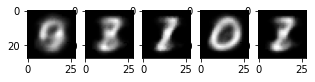

epoch  10
reconstruction loss: 4.201
epoch  11
reconstruction loss: 4.161
epoch  12
reconstruction loss: 4.118
epoch  13
reconstruction loss: 4.072
epoch  14
reconstruction loss: 4.040


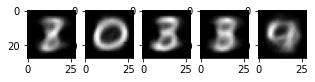

epoch  15
reconstruction loss: 3.999
epoch  16
reconstruction loss: 3.966
epoch  17
reconstruction loss: 3.945
epoch  18
reconstruction loss: 3.918
epoch  19
reconstruction loss: 3.890


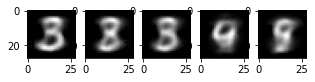

epoch  20
reconstruction loss: 3.856
epoch  21
reconstruction loss: 3.836
epoch  22
reconstruction loss: 3.815
epoch  23
reconstruction loss: 3.786
epoch  24
reconstruction loss: 3.763


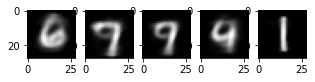

epoch  25
reconstruction loss: 3.734
epoch  26
reconstruction loss: 3.703
epoch  27
reconstruction loss: 3.691
epoch  28
reconstruction loss: 3.669
epoch  29
reconstruction loss: 3.639


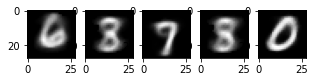

epoch  30
reconstruction loss: 3.635
epoch  31
reconstruction loss: 3.608
epoch  32
reconstruction loss: 3.600
epoch  33
reconstruction loss: 3.591
epoch  34
reconstruction loss: 3.570


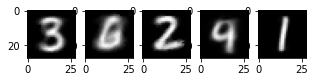

epoch  35
reconstruction loss: 3.568
epoch  36
reconstruction loss: 3.558
epoch  37
reconstruction loss: 3.540
epoch  38
reconstruction loss: 3.522
epoch  39
reconstruction loss: 3.521


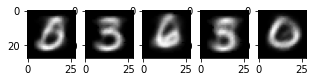

epoch  40
reconstruction loss: 3.510
epoch  41
reconstruction loss: 3.495
epoch  42
reconstruction loss: 3.490
epoch  43
reconstruction loss: 3.483
epoch  44
reconstruction loss: 3.469


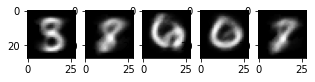

epoch  45
reconstruction loss: 3.472
epoch  46
reconstruction loss: 3.467
epoch  47
reconstruction loss: 3.461
epoch  48
reconstruction loss: 3.443
epoch  49
reconstruction loss: 3.434


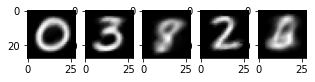

epoch  50
reconstruction loss: 3.435
epoch  51
reconstruction loss: 3.414
epoch  52
reconstruction loss: 3.417
epoch  53
reconstruction loss: 3.399
epoch  54
reconstruction loss: 3.399


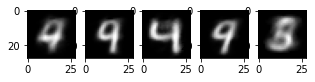

epoch  55
reconstruction loss: 3.392
epoch  56
reconstruction loss: 3.382
epoch  57
reconstruction loss: 3.376
epoch  58
reconstruction loss: 3.363
epoch  59
reconstruction loss: 3.353


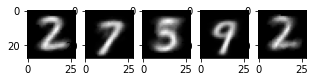

epoch  60
reconstruction loss: 3.354
epoch  61
reconstruction loss: 3.344
epoch  62
reconstruction loss: 3.348
epoch  63
reconstruction loss: 3.339
epoch  64
reconstruction loss: 3.332


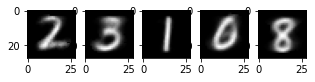

epoch  65
reconstruction loss: 3.323
epoch  66
reconstruction loss: 3.323
epoch  67
reconstruction loss: 3.306
epoch  68
reconstruction loss: 3.310
epoch  69
reconstruction loss: 3.297


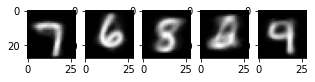

epoch  70
reconstruction loss: 3.296
epoch  71
reconstruction loss: 3.296
epoch  72
reconstruction loss: 3.284
epoch  73
reconstruction loss: 3.285
epoch  74
reconstruction loss: 3.278


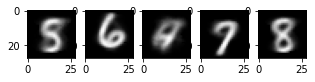

epoch  75
reconstruction loss: 3.267
epoch  76
reconstruction loss: 3.261
epoch  77
reconstruction loss: 3.256
epoch  78
reconstruction loss: 3.248
epoch  79
reconstruction loss: 3.249


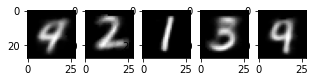

epoch  80
reconstruction loss: 3.245
epoch  81
reconstruction loss: 3.241
epoch  82
reconstruction loss: 3.232
epoch  83
reconstruction loss: 3.229
epoch  84
reconstruction loss: 3.221


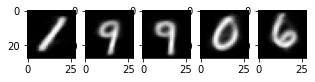

epoch  85
reconstruction loss: 3.223
epoch  86
reconstruction loss: 3.211
epoch  87
reconstruction loss: 3.219
epoch  88
reconstruction loss: 3.196
epoch  89
reconstruction loss: 3.206


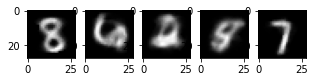

epoch  90
reconstruction loss: 3.204
epoch  91
reconstruction loss: 3.197
epoch  92
reconstruction loss: 3.190
epoch  93
reconstruction loss: 3.188
epoch  94
reconstruction loss: 3.187


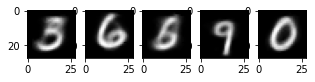

epoch  95
reconstruction loss: 3.181
epoch  96
reconstruction loss: 3.170
epoch  97
reconstruction loss: 3.173
epoch  98
reconstruction loss: 3.172
epoch  99
reconstruction loss: 3.162


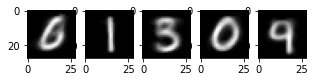

epoch  100
reconstruction loss: 3.155


In [4]:
################################################################################
# train model ##################################################################

# train single epoch
def train_autoencoder_single_epoch(model, dataloader, idx_epoch):
    model.train().cuda()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    epoch_loss = 0
    # train model
    for imgs, labels in dataloader:
        optimizer.zero_grad()
        imgs = imgs.cuda()
        imgs_regen, z = model(imgs)
        loss = criterion(imgs_regen, imgs)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    # plot regenerated imgs
    if idx_epoch % 5 == 0:
        fig = plt.figure(figsize=(5, 30))
        for idx in range(5):
            img = imgs_regen[idx].cpu().squeeze().detach().numpy()
            ax = fig.add_subplot(1, 5, idx + 1)
            ax.imshow(img, cmap=cm.gray)
        plt.show()
    return epoch_loss

# train model
def train_autoencoder(model, dataloader, n_epoch=30):
    loss_list = []
    model
    for idx_epoch in range(1, n_epoch + 1):
        epoch_loss = train_autoencoder_single_epoch(model, dataloader, idx_epoch)
        print('epoch ', idx_epoch)
        print('reconstruction loss: {:.3f}'.format(epoch_loss))
    return model

################################################################################


#==============================================================================#
# train model =================================================================#
model = Autoencoder()
trained_ae = train_autoencoder(model, test_loader, n_epoch=100)
#==============================================================================#

## **Plot Latenet Vector**
2 dimensional latenet vector (z) plotted for test dataset. The same labels are in similar latent space.

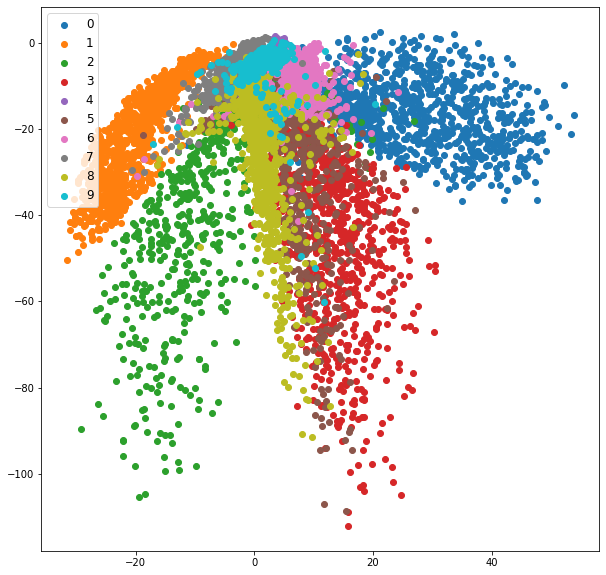

In [5]:
################################################################################
# plot fxns ####################################################################

def plot_scatter(model, loader):
    # get z sampling
    model.cpu()
    z_sampled = []
    label_sampled = []
    for imgs, labels in loader:
        _, z = model(imgs)
        z_sampled.append(z) # z[b 2]
        label_sampled.append(labels)
    del imgs
    z_to_plot = torch.cat(z_sampled, dim=0).cpu() # z[n 2]
    label_to_plot = torch.cat(label_sampled, dim=0)
    z_to_plot = z_to_plot[:,:]
    label_to_plot = label_to_plot[:]
    # plot
    x_data = z_to_plot[:,0].squeeze().detach().numpy()
    y_data = z_to_plot[:,1].squeeze().detach().numpy()
    label_data = label_to_plot[:].squeeze().detach().numpy()
    plot_group = [[[],[]] for _ in range(10)]
    for idx in range(len(x_data)):
        label = label_data[idx]
        plot_group[label][0].append(x_data[idx])
        plot_group[label][1].append(y_data[idx])
    plt.figure(figsize=(10,10))
    for number, group in enumerate(plot_group):
        x, y = group
        plt.scatter(x, y, label = str(number))
    plt.legend(fontsize=12, loc='upper left')
    plt.show()
    return None
    
################################################################################


#==============================================================================#
# train model =================================================================#
plot_scatter(trained_ae, test_loader)
#==============================================================================#